# Análise dos Dados de Clientes de Empréstimos

Este trabalho consiste em analisar os dados de clientes que contraíram empréstimos junto a uma instituição financeira, com o objetivo de classificá-los em pagantes ou inadimplentes utilizando algoritmos de aprendizagem de máquina.

## Obtenção dos Dados

Os dados analisados aqui foram disponibilizados em formato ".csv" no moodle da disciplina CI171 Aprendizagem de Máquina, ofertada pelo Departamento de Informática da UFPR para discentes da graduação e pós-graduação stricto sensu.

O arquivo pode ser consultado neste [link](https://drive.google.com/open?id=1y2RBTw0zVAWy6KoRKT1gclU7aB1u_X-P).

## Importando os Dados

Vamos importar a pasta pessoal no Google Drive em que foi feito o upload do arquivo com os dados dos clientes.

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


O arquivo será carregado numa estrutura DataFrame utilizando a biblioteca Pandas para podermos manipular e analisar os dados.

In [0]:
import numpy as np

# Configura semente para reprodutibilidade
np.random.seed(seed=1)

A base de dados contêm um total de 219.984 registros de clientes que contraíram empréstimos junto a instituição financeira. Os dados desses clientes estão distribuídos em 672 atributos ao todo.
Sabe-se que os clientes que realizaram o pagamento em até 30 dias possuem a variável alvo "Y" com valor zero (Y=0). Caso contrário, essa mesma variável possui valor unitário (Y=1). A base contém  registros.

In [0]:
import pandas as pd

path = "/content/drive/My Drive/Data/"
filename = "credit.csv"

df = pd.read_csv(path + filename)

## Análise Exploratória

A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas.
Isso possibilita criarmos uma consciência inicial a respeito do formato de entrada e da estrutura geral dos dados.

Vamos analisar as dimensões do DataFrame.

In [0]:
print("Linhas\t\t{}".format(df.shape[0]))
print("Colunas\t\t{}".format(df.shape[1]))

Linhas		219984
Colunas		674


Os primeiros 5 registros desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [0]:
df.head()

,ID,Y,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v33,v35,v37,v39,v41,v43,v45,...,v691,v692,v693,v694,v695,v696,v697,v698,v699,v700,v701,v702,v703,v704,v705,v706,v32,v34,v36,v38,v40,v42,v44,v46,v48,v50,v52,v54,v56,v58,v60,v62,v64,v66,v68,v70,v72,v74,v76,v78
0,151601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0.333333,1.0,549.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,628.0,NaN,754.0,861.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,1.000000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429.0,NaN,619.0,432.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200877,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.250000,3.0,7069.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,378.0,NaN,640.0,620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,450.0,300.0,1720.4
3,130751,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0.000000,1.0,5447.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,737.0,737.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202571,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,3.0,582.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,411.0,568.0,274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3076.0


Verificamos a presença de colunas nomeadas genericamente de "v1" até "v706", representando os dados dos clientes, bem como as colunas "ID" e "Y", que representam o sequencial no bando de dados de origem e a variável alvo, respectivamente.

Por meio do método describe, podemos obeter um resumo estatístico das variáveis numéricas.

In [0]:
df.describe()

,ID,Y,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v33,v35,v37,v39,v41,v43,v45,...,v691,v692,v693,v694,v695,v696,v697,v698,v699,v700,v701,v702,v703,v704,v705,v706,v32,v34,v36,v38,v40,v42,v44,v46,v48,v50,v52,v54,v56,v58,v60,v62,v64,v66,v68,v70,v72,v74,v76,v78
count,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,...,219984.000000,185167.000000,185167.000000,219984.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,185167.000000,219917.000000,89606.000000,219917.000000,219917.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,219984.000000,2.199840e+05,219984.000000,2.199840e+05,219984.000000,2.199840e+05,2.199840e+05,2.199840e+05,219984.000000,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05,2.199840e+05
mean,132487.078428,0.795153,0.028125,0.006019,0.022888,0.000014,0.022879,0.012719,0.062845,0.103285,0.134987,0.160321,0.013183,0.021811,0.030166,0.040167,0.052477,0.087565,0.114954,0.136814,0.000018,0.000027,0.000027,0.000027,0.052463,0.087552,0.114945,0.136805,0.026688,0.042426,0.053645,0.061459,0.034680,0.014783,0.003037,0.769320,0.065678,0.027488,0.005914,0.773261,...,0.279715,2.915357,4456.659237,2.917139,0.034166,0.037724,0.071891,0.163776,0.115436,0.089379,0.047757,0.363677,271.449056,445.957715,500.177281,459.087533,68.621873,26.947630,9.186014,9.288805,133.954505,50.238273,20.133464,2.463300e+01,199.978883,7.921438e+01,29.183371,3.456678e+01,3.676286e+02,1.329573e+02,57.383859,5.883701e+01,6.532836e+02,2.293493e+02,1.501071e+02,1.071574e+02,4.608983e+03,1.550751e+03,7.930973e+02,8.939231e+02
std,81156.147491,0.403590,0.165330,0.077346,0.149547,0.003693,0.149518,0.112060,0.242685,0.304331,0.341711,0.366904,0.114057,0.146065,0.171044,0.196350,0.222987,0.282663,0.318967,0.343652,0.004264,0.005222,0.005222,0.005222,0.222959,0.282643,0.318956,0.343643,0.161171,0.201559,0.225316,0.240171,0.515227,0.264894,0.133251,0.436365,0.878863,0.417883,0.243612,0.465819,...,0.365646,1.939841,2844.074075,4.242006,0.115018,0.151813,0.187441,0.370074,0.319549,0.285290,0.213252,0.481059,271.813726,116.954534,206.758484,211.467002,1855.977810,859.341036,499.648692,669.782825,3099.869716,1316.501031,1169.107839,2.566514e+03,4679.943104,3.073972e+03,1482.978327,2.798439e+03,8.548839e+03,3.646146e+03,2837.333744,3.353364e+03,1.615675e+04,5.266965e+03,2.228688e+04,3.909434e+03,5.881932e+04,1.520116e+04,3.264361e+04,1.443663e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,58575.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

Observamos que todas as colunas são numéricas. Apesar dessa ser a nossa conclusão olhando as primeiras entradas, é prudente analisar por meio do atributo dtypes para ter certeza que nenhuma foi importada como texto.

In [0]:
df.dtypes

ID       int64
Y        int64
v1       int64
v2       int64
v3       int64
        ...   
v70    float64
v72    float64
v74    float64
v76    float64
v78    float64
Length: 674, dtype: object

Em projetos de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.

In [0]:
# Configurando o número de linhas a serem mostradas
pd.set_option("display.max_rows", df.shape[0] + 1)

df.isnull().sum().sort_values(ascending=False)

v212    219983
v207    219983
v236    219983
v355    219983
v354    219983
v199    219983
v261    219983
v390    219983
v389    219983
v353    219983
v352    219983
v391    219983
v414    219983
v415    219983
v413    219983
v412    219983
v411    219983
v388    219983
v210    219983
v410    219983
v409    219983
v408    219983
v162    219981
v383    219981
v382    219981
v381    219981
v380    219981
v384    219980
v387    219980
v386    219980
v536    219980
v234    219980
v259    219980
v385    219980
v537    219980
v538    219980
v175    219980
v539    219980
v342    219977
v328    219977
v329    219977
v330    219977
v331    219977
v340    219977
v341    219977
v343    219977
v206    219977
v205    219977
v532    219975
v533    219975
v534    219975
v535    219975
v222    219975
v189    219975
v158    219971
v332    219970
v333    219969
v334    219968
v335    219967
v223    219967
v544    219967
v545    219967
v546    219967
v547    219967
v419    219965
v417    219965
v416    21

Podemos observar que a maioria das colunas deste dataset apresenta muitos valores ausentes (NA: Not Available).

Também é interessante verificar a quantidade de valores únicos para cada feature, pois isso permite verificar se os números podem estar representando classes, por exemplo.

In [0]:
pd.reset_option("display.max_rows")

df.nunique().sort_values()

v544         1
v526         1
v535         1
v261         1
v534         1
         ...  
v74      28674
v72      38103
v695     54241
v697     64902
ID      219984
Length: 674, dtype: int64

Agora vamos verificar o balanceamento do dataset vendo a porcentagem de valores da variável alvo "Y". Como se pode ver abaixo, a base é extremamente desbalanceada.

In [0]:
print(100 * df.Y.value_counts() / df.shape[0])

1    79.515328
0    20.484672
Name: Y, dtype: float64


Portanto, podemos concluir que quase 80% dos registros se referem a clientes inadimplentes (Y=1) que não realizaram pagamento em até 30 dias. Para melhor ilustrar a situação, podemos usar um gráfico de barras.

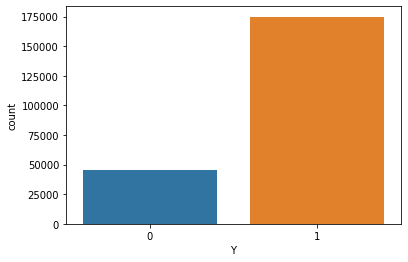

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Plota quantidade de amostras de cada classe
fig, ax = plt.subplots()
sns.countplot("Y", data=df, ax=ax)
plt.show()

## Preparação dos Dados

Podemos remover a coluna "ID" do dataset por não se tratar de uma característica discriminante que nos auxiliará em classificar clientes em pagantes ou inadimplentes. Se trata apenas de um valor sequencial do banco de dados de origem.

In [0]:
df.pop("ID")

0         151601
1          75091
2         200877
3         130751
4         202571
           ...  
219979    205175
219980     42905
219981     87310
219982     42906
219983     76774
Name: ID, Length: 219984, dtype: int64

Podemos remover os registros que possuem pelo menos um valor ausente numa das 672 variáveis (ignorando as colunas "Y" e "ID"). Isso é feito pois não sabemos previamente se certa variável possui grande valor informacional e, devido a isso podemos ter problemas em classificar uma observação que não possua um valor coerente para essa mesma variável.

In [0]:
df.dropna(axis=1, how="any", inplace=True)

print("Colunas\t\t{}".format(df.shape[1]))

Colunas		196


Dessa forma, reduzimos o número de variáveis de nosso dataset de 672 para 195.

## Visualização dos Dados

Para ter a noção de como as variáveis estão distribuídas, poderíamos plotar o histograma de algumas variáveis numéricas e também um *heatmap* para verificar potenciais correlações entre variáveis.

Porém, este dataset apresenta um grande número de variáveis (672 atributos no total), o que torna desafiador visualizar esses padrões graficamente.

Para contornar isso, podemos utilizar técnicas de redução de dimensionalidade, como PCA (Principal Component Analysis) e t-SNE (t-Distributed Stochastic Neighbor Embedding).

Mas antes de aplicarmos PCA, precisamos normalizar nossos dados.

In [0]:
# Separa as classes e características
y = df.pop("Y")
X = df

# Guarda o nome das variáveis
feat_cols = X.columns

Aplicando efetivamente normalização Min-Max somente nos dados.

In [0]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_scaled = minmax_scaler.fit_transform(X)

Para facilitar a visualização dos dados, vamos criar um novo DataFrame já normalizado.

In [0]:
df_scaled = pd.DataFrame(X_scaled, columns=feat_cols)
df_scaled["y"] = y
df_scaled["label"] = df_scaled["y"].apply(lambda i: str(i))
df = df_scaled.copy() # Atualiza dataset com os dados normalizados

print("Tamanho do DataFrame normalizado: {}".format(df_scaled.shape))

Tamanho do DataFrame normalizado: (219984, 197)


### PCA

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

print("Variância das principais componentes: {}".format(pca.explained_variance_ratio_))

Variância das principais componentes: [0.24606788 0.11154604 0.089575  ]


Vemos que as duas primeiras componentes contribuem para 35,76% do total de variância.

O próximo passo é descobrir se isso é suficiente para separar visualmente as duas classes plotando um gráfico de dispersão da primeira e segunda componente principal, colorindo cada um dos diferentes grupos com uma cor diferente. Se tivermos sorte, as amostras de cada classe estarão agrupadas, significando que as componentes dizem muito sobre os clientes.

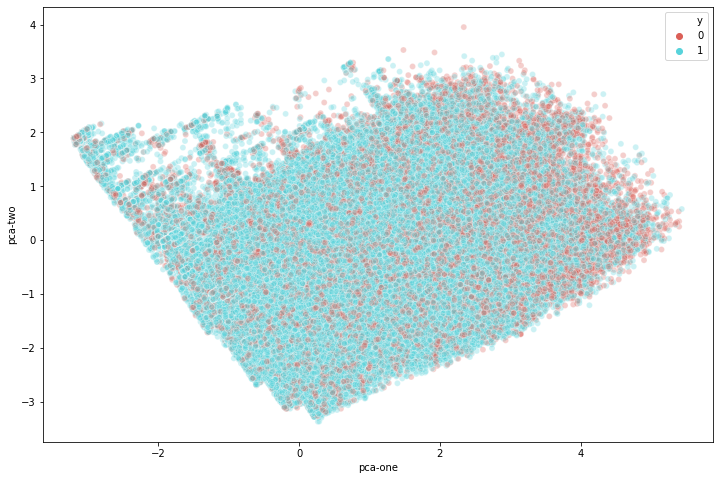

In [0]:
rndperm = np.random.permutation(df.shape[0])

df_scaled["pca-one"] = pca_result[:, 0]
df_scaled["pca-two"] = pca_result[:, 1]
df_scaled["pca-three"] = pca_result[:, 2]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_scaled.loc[rndperm, :],
    legend="full",
    alpha=0.3
)

Do gráfico, observamos que as duas componentes não são suficientes para distinguir as amostras em duas classes. Muitas das observações de ambas as classes estão sobrepostas, sendo impossível visualizar qualquer fronteira entre regiões.

Vamos tentar uma versão 3D do mesmo gráfico.

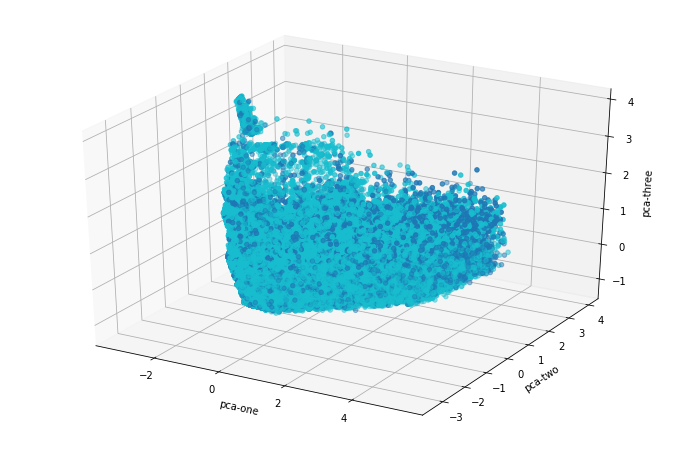

In [0]:
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(fig)

ax = plt.figure(figsize=(12, 8)).gca(projection="3d")
ax.scatter(
    xs=df_scaled.loc[rndperm, :]["pca-one"],
    ys=df_scaled.loc[rndperm, :]["pca-two"],
    zs=df_scaled.loc[rndperm, :]["pca-three"],
    c=df_scaled.loc[rndperm, :]["y"],
    cmap="tab10"
)
ax.set_xlabel("pca-one")
ax.set_ylabel("pca-two")
ax.set_zlabel("pca-three")
plt.show()

Mesmo utilizando três dimensões, os resultados não são muito diferentes.

### t-SNE

t-SNE é outra técnica para redução de dimensionalidade e é particularmente adequada para a visualização de conjuntos de dados de alta dimensão. Ao contrário do PCA, não é uma técnica matemática, mas probabilística. Seu funcionamento é descrito no [artigo original](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).

É recomendado utilizar outra técnica de redução dimensionalidade (como o próprio PCA) antes de aplicar t-SNE para diminuir custos computacionais.

Além disso, desta vez usaremos 10.000 amostras das 219.984 para garantir que o algoritmo não consuma muita memória e processamento.

In [0]:
N = 10000

df_subset = df_scaled.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

df_subset["pca-one"] = pca_result_50[:, 0]
df_subset["pca-two"] = pca_result_50[:, 1] 
df_subset["pca-three"] = pca_result_50[:, 2]

print("Variância acumulativa para 50 componentes: {}".format(np.sum(pca_50.explained_variance_ratio_)))

Variância acumulativa para 50 componentes: 0.9881363792988985


Vamos agora aplicar t-SNE sobre as 50 componentes principais que concentram 98,81% de variância.

In [0]:
import time
from sklearn.manifold import TSNE

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

print("t-SNE executado em {} segundos".format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.022s...
[t-SNE] Computed neighbors for 10000 samples in 6.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.066414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.566277
[t-SNE] KL divergence after 300 iterations: 2.329521
t-SNE executado em 45.621

Para comparação, vamos plotar lado a lado os resultados obtidos usando PCA e PCA + t-SNE.

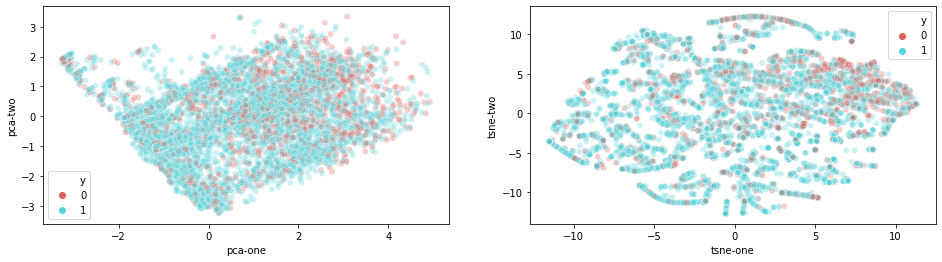

In [0]:
df_subset["tsne-one"] = tsne_results[:, 0]
df_subset["tsne-two"] = tsne_results[:, 1]

plt.figure(figsize=(16, 4))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

Aparentemente as amostras se distribuem mais organizadamente utilizando t-SNE, porém ainda assim é praticamente impossível reconhecer agrupamentos distintos que representem bem as duas classes.

Com base nesses gráficos, podemos dizer que não será fácil para nosso modelo construir uma fronteira de decisão que generalize bem as classes de pagantes e inadimplentes em nossa base de dados.

## Pré-Processamento

Uma das formas de se lidar com dados desbalanceados é realizando uma subamostragem (downsampling), eliminando aleatoriamente amostras da classe majoritária de forma a igualar o número de observações de cada uma das classes.

### Subamostragem

Realizando subamostagem na base desbalanceada.

In [0]:
from sklearn.utils import resample

def downsample(n_samples):

  # Separa em classe majoritária e minoritária
  df_majority = df[df.label == "1"] # inadimplentes
  df_minority = df[df.label == "0"] # realizaram pagamento
  
  # Subamostra a classe majoritária
  df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=n_samples,
                                  random_state=1) 
  
  # Combina a classe minoritária com a classe majoritária subamostrada
  df_downsampled = pd.concat([df_majority_downsampled, df_minority])
  return df_downsampled

In [0]:
# Conta o número de amostras de cada classe
print(df["label"].value_counts())

df_downsampled = downsample(n_samples=df["label"].value_counts().values[1])
df_downsampled.reset_index(inplace=True, drop=True) 

# Mostra a nova contagem de amostras
print(df_downsampled.label.value_counts())

1    174921
0     45063
Name: label, dtype: int64
0    45063
1    45063
Name: label, dtype: int64


Dessa forma, agora temos um novo DataFrame com números iguais de observações para as duas classes e, podemos continuar nosso trabalho.

O próximo passso é separar as classes e características nas variáveis X e y, respectivamente, para facilitar o nossoo uso do framework scikit-learn.

In [0]:
# Separa as classes e características
y = df_downsampled.pop("label")
df_downsampled.pop("y")
X = df_downsampled

print(X.head())
print(y.head())

    v1   v2   v3   v4   v5   v6  ...  v68  v70       v72       v74  v76       v78
0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000299  0.000947  0.0  0.000000
1  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000000  0.000000  0.0  0.000000
2  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000313  0.000612  0.0  0.000580
3  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000054  0.000000  0.0  0.000176
4  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.000000  0.000000  0.0  0.000000

[5 rows x 195 columns]
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: object


## Seleção de Características

Será que nosso dataset está pronto para treinamento?

Não parece demais termos ainda 195 atributos para construirmos nosso modelo de Machine Learning?

Uma estratégia para reduzir o custo computacional de nosso modelo é utilizar um método de seleção de atributos. Um dos mais utilizados é o método Embedded baseado em Árvores de Decisão.

Vamos analisar o nível informacional dos 195 atributos de nosso dataset e escolher os atributos mais relevantes.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Cria floresta
forest = ExtraTreesClassifier(n_estimators=100, random_state=1)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprime o ranking de importância das características
print("Ranking de características:")
for f in range(X.shape[1]):
    print("%d. característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Ranking de características:
1. característica 165 (0.114185)
2. característica 164 (0.047331)
3. característica 167 (0.045758)
4. característica 169 (0.038048)
5. característica 170 (0.035362)
6. característica 168 (0.021720)
7. característica 74 (0.021472)
8. característica 75 (0.017252)
9. característica 82 (0.015747)
10. característica 79 (0.015086)
11. característica 115 (0.014175)
12. característica 114 (0.014018)
13. característica 83 (0.013426)
14. característica 117 (0.013409)
15. característica 116 (0.012625)
16. característica 86 (0.011870)
17. característica 84 (0.011420)
18. característica 78 (0.011135)
19. característica 85 (0.010527)
20. característica 87 (0.009866)
21. característica 145 (0.009640)
22. característica 143 (0.009635)
23. característica 144 (0.009183)
24. característica 88 (0.009161)
25. característica 102 (0.009100)
26. característica 142 (0.009050)
27. característica 89 (0.008965)
28. característica 158 (0.008902)
29. característica 80 (0.008207)
30. cara

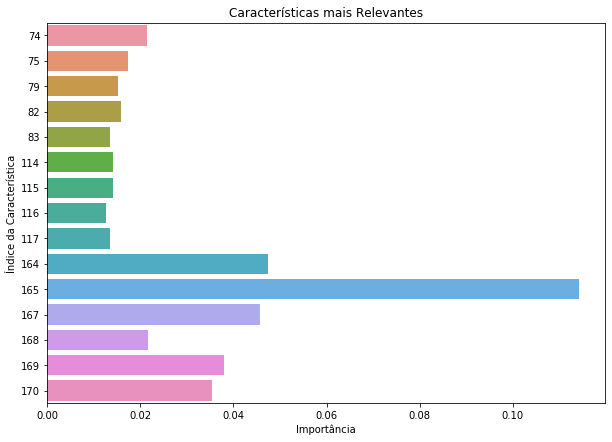

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Plota as 10 características mais relevantes
n_features = 15
feature_importances = pd.Series(data=importances[indices[:n_features]], index=indices[:n_features])
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances, y=feature_importances.index, orient="h").set_title("Características mais Relevantes")
plt.xlabel("Importância")
plt.ylabel("Índice da Característica")
plt.show()

Observe como o atributo de índice 165 está bem destacado em relação aos demais.

Vamos selecionar as 10 características que mais concentram valor informacional.

In [0]:
print("Número de características antes da seleção:", X.shape[1])

# Seleção de características
model = SelectFromModel(forest, prefit=True, threshold=-np.inf, max_features=10)
X = model.transform(X)

print("Número de características selecionadas:", X.shape[1])

Número de características antes da seleção: 195
Número de características selecionadas: 10


## Separando os Dados em Treinamento, Validação e Teste

A base de dados será dividida em 50%, 20% e 30% para treinamento, validação e teste, respectivamente. 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, stratify=y_test, random_state=1)

print("X:", X.shape)
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

X: (90126, 10)
X_train: (45063, 10)
X_val: (18026, 10)
X_test: (27037, 10)


## Treinamento e Validação

Vamos treinar classificadores individualmente, escolhendo alguns hiperparâmetros a partir de *cross-validation*, e observar o desempenho desses modelos na base de validação.

### LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Naïve Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Regressão Logística

In [0]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver="liblinear")
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Árvore de Decisão

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=1)
params_tree = {"max_depth": np.arange(5, 10),
               "min_samples_leaf": [20, 50, 100]}

tree_gs = GridSearchCV(tree, params_tree, cv=5)
tree_gs.fit(X_train, y_train)

tree_best = tree_gs.best_estimator_
print(tree_best)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')


### kNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

params_knn = {"n_neighbors": np.arange(10, 15)}

knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

knn_best = knn_gs.best_estimator_
print(knn_best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

params_rf = {"n_estimators": [150, 200, 250]}

rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

rf_best = rf_gs.best_estimator_
print(rf_best)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


A partir desses modelos, conseguimos alcançar os seguintes resultados na base de validação.

In [0]:
print("lda: {}".format(lda.score(X_val, y_val)))
print("nb: {}".format(nb.score(X_val, y_val)))
print("log: {}".format(log.score(X_val, y_val)))
print("tree: {}".format(tree_best.score(X_val, y_val)))
print("knn: {}".format(knn_best.score(X_val, y_val)))
print("rf: {}".format(rf_best.score(X_val, y_val)))

lda: 0.5873737934095196
nb: 0.5748918229224453
log: 0.5869299900144236
tree: 0.5995229113502718
knn: 0.5865971374681016
rf: 0.5853766781315877


### Combinação de Classificadores

Nós podemos ainda combinar os três melhores classificadores para obter um resultado melhor ainda de classificação.

In [0]:
from sklearn.ensemble import VotingClassifier

estimators = [("lda", lda), ("tree_best", tree_best), ("rf_best", rf_best)]
ensemble = VotingClassifier(estimators, weights=[1, 2, 1], voting="soft")

ensemble.fit(X_train, y_train)
print("Acurácia na base de validação:", ensemble.score(X_val, y_val))

Acurácia na base de validação: 0.6029069122378786


Observe que houve uma modesta melhora ao alcançar 60,29% de acurácia na base de validação.

## Resultados

Vamos ver os resultados que o nosso classificador com melhor desempenho individual consegue obter.

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.63      0.50      0.56     13518
           1       0.59      0.71      0.64     13519

    accuracy                           0.60     27037
   macro avg       0.61      0.60      0.60     27037
weighted avg       0.61      0.60      0.60     27037

Acurácia: 0.6048008284942856
[[6742 6776]
 [3909 9610]]


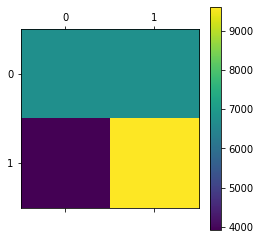

In [0]:
import sklearn.metrics as metrics
import pylab as pl

# Predição
y_pred = tree_best.predict(X_test)

# Resultados
print("Relatório de Classificação")
target_names = ["0", "1"]
print(metrics.classification_report(y_test, y_pred, target_names=target_names))
print("Acurácia:", tree_best.score(X_test, y_test))

# Calcula a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Plota matriz de confusão
pl.matshow(cm)
pl.colorbar()
pl.show()

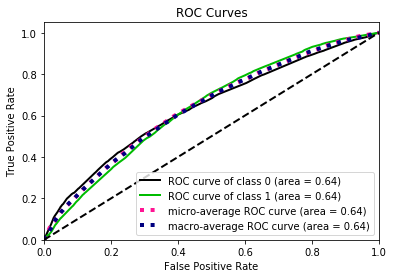

In [0]:
!pip install scikit-plot
import scikitplot as skplt

# Plota curva ROC
y_probs = tree_best.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs)
plt.show()

Utilizando apenas um classificador baseado em Árvore de Decisão, obtemos uma acurácia de 60,48% e AUC de 0,64.

Será que nosso Ensemble de classificadores alcança melhores resultados? Vamos ver.

Relatório de Classificação
              precision    recall  f1-score   support

           0       0.62      0.55      0.58     13518
           1       0.60      0.67      0.63     13519

    accuracy                           0.61     27037
   macro avg       0.61      0.61      0.61     27037
weighted avg       0.61      0.61      0.61     27037

Acurácia: 0.6083515182897511
[[7426 6092]
 [4497 9022]]


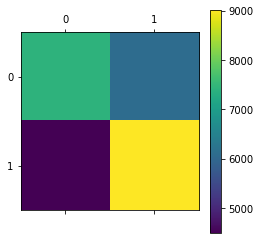

In [0]:
# Predição
y_pred = ensemble.predict(X_test)

# Resultados
print("Relatório de Classificação")
print(metrics.classification_report(y_test, y_pred, target_names=target_names))
print("Acurácia:", ensemble.score(X_test, y_test))

# Calcula matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

# Plota matriz de confusão
pl.matshow(cm)
pl.colorbar()
pl.show()

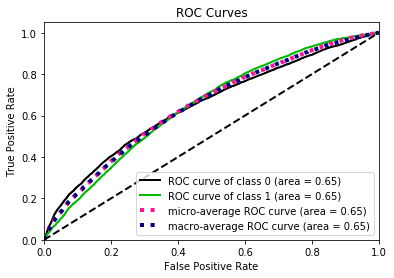

In [0]:
# Plota curva ROC
y_probs = ensemble.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs)
plt.show()

Combinando paralelamente os classificadores LDA, Árvore de Decisão e Random Forest alcançamos 60,84% de acurácia e AUC de 0,65, o que representa uma ligeira melhoria de desempenho na base de testes.

Por fim, vamos visualizar graficamente a atuação do combinador VotingClassifier ao predizer a classe de uma amostra de exemplo.

Para isso, vamos plotar as probabilidades dos classificadores LDA, Árvore de Decisão e Random Forest para uma dada amostra.

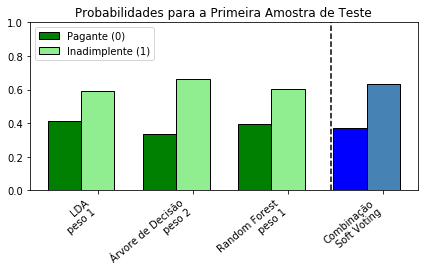

In [0]:
# Predição de todos os classificadores
probas = [c.fit(X_test, y_test).predict_proba(X) for c in (lda, tree_best, rf_best, ensemble)]

# Calcula as probabilidades para a primeira amostra de teste
class0_1 = [pr[0, 0] for pr in probas]
class1_1 = [pr[0, 1] for pr in probas]


# Plota as probabilidades

N = 4 # número de grupos
ind = np.arange(N) # posições dos grupos
width = 0.35 # largura das barras

fig, ax = plt.subplots()

# Barras dos classificadores
p1 = ax.bar(ind, np.hstack(([class0_1[:-1], [0]])), width,
            color="green", edgecolor="k")
p2 = ax.bar(ind + width, np.hstack(([class1_1[:-1], [0]])), width,
            color="lightgreen", edgecolor="k")

# Barras do ensemble
p3 = ax.bar(ind, [0, 0, 0, class0_1[-1]], width,
            color="blue", edgecolor="k")
p4 = ax.bar(ind + width, [0, 0, 0, class1_1[-1]], width,
            color="steelblue", edgecolor="k")

# Anotações
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(["LDA\npeso 1",
                    "Árvore de Decisão\npeso 2",
                    "Random Forest\npeso 1",
                    "Combinação\nSoft Voting"],
                   rotation=40,
                   ha="right")
plt.ylim([0, 1])
plt.title("Probabilidades para a Primeira Amostra de Teste")
plt.legend([p1[0], p2[0]], ["Pagante (0)", "Inadimplente (1)"], loc="upper left")
plt.tight_layout()
plt.show()

A ideia por trás do VotingClassifier é combinar classificadores de aprendizagem de máquina conceitualmente diferentes e usar um voto majoritário ou a probabilidade média prevista (*soft voting*) para prever os rótulos das classes.

Poranto, conseguimos equilibrar as fraquezas individuais dos classificadores utilizando essa técnica de Ensemble e, dessa forma, atingimos um melhor desempenho de classificação de clientes como pagantes ou inadimplentes.